In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Read in and basic overview

In [2]:
df = pd.read_csv('../data/Capital_Projects.csv')
print(df.shape)
df.tail()

(2259, 16)


,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
2254,09/01/2019 12:00:00 AM,1010,PRIOR NOTICE SIDEWALKS - BROOKLYN,PRIOR NOTICE SIDEWALKS - BROOKLYN,Streets and Roadways,NaN,DDC,DOT,Construction,08/06/2015,29427000.0,NaN,NaN,05/13/2020,NaN,NaN
2255,09/01/2019 12:00:00 AM,1011,"RECONSTRUCTION OF ROSEDALE AREA, PHASE 2",NaN,Streets and Roadways,NaN,DDC,DOT,Design,06/07/2018,39360000.0,NaN,NaN,08/14/2024,NaN,NaN
2256,09/01/2019 12:00:00 AM,1012,"RECONSTRUCTION OF FRONT STREET, MANHATTAN","Reconstruction of Front Street, Manhattan",Streets and Roadways,NaN,DDC,DOT,Construction Procurement,07/31/2015,27356000.0,NaN,NaN,06/16/2022,NaN,NaN
2257,09/01/2019 12:00:00 AM,1013,"GRAND CONCOURSE, PHASE 5",THE FIFTH PHASE OF THE RECONSTRUCTION OF THE G...,Streets and Roadways,NaN,DDC,DOT,Design,09/16/2019,78921000.0,NaN,NaN,09/13/2025,NaN,NaN
2258,09/01/2019 12:00:00 AM,1014,RECONSTRUCTION OF BROADWAY PHASE 2,RECONSTRUCTION OF BROADWAY PHASE 2 - The propo...,Streets and Roadways,NaN,DDC,DOT,Design,08/22/2019,31110000.0,NaN,NaN,07/17/2026,NaN,NaN


In [3]:
df.describe()

,PID,Budget Forecast,Latest Budget Changes,Total Budget Changes,Latest Schedule Changes,Total Schedule Changes
count,2259.000000,2.153000e+03,1.881000e+03,2.194000e+03,1866.000000,2186.000000
mean,487.699867,1.456504e+08,2.342525e+06,1.838732e+07,74.543944,669.718207
std,258.005332,3.241323e+08,3.387314e+07,7.440035e+07,1115.490817,718.792415
min,3.000000,-4.102606e+06,-3.129920e+08,-2.919002e+08,-32620.000000,-1462.000000
25%,314.000000,3.913500e+07,-1.750000e+05,0.000000e+00,0.000000,77.000000
50%,504.000000,6.078000e+07,1.300000e+04,5.827000e+06,0.000000,621.000000
75%,668.000000,1.103256e+08,2.100000e+06,2.990000e+07,149.500000,1097.000000
max,1014.000000,2.631661e+09,7.288500e+08,8.078026e+08,32872.000000,3253.000000


In [4]:
df.describe(include = 'all')

# Comparing the 1st row we see that there seem to be missing values in all fields except for
# date reported, PID, Project Name, Category and Managing Agency

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
count,2259,2259.000000,2259,2150,2259,1634,2259,1644,2154,2095,2.153000e+03,1.881000e+03,2.194000e+03,2137,1866.000000,2186.000000
unique,15,NaN,377,530,22,19,12,30,6,341,NaN,NaN,NaN,1019,NaN,NaN
top,09/01/2019 12:00:00 AM,NaN,Broadway Bridge over Harlem River Replacement,Design and construction of a new school,Streets and Roadways,Brooklyn,DDC,DEP,Design,06/30/2004,NaN,NaN,NaN,09/03/2021,NaN,NaN
freq,378,NaN,15,114,483,455,901,784,932,42,NaN,NaN,NaN,58,NaN,NaN
mean,NaN,487.699867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.456504e+08,2.342525e+06,1.838732e+07,NaN,74.543944,669.718207
std,NaN,258.005332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.241323e+08,3.387314e+07,7.440035e+07,NaN,1115.490817,718.792415
min,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.102606e+06,-3.129920e+08,-2.919002e+08,NaN,-32620.000000,-1462.000000
25%,NaN,314.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.913500e+07,-1.750000e+05,0.000000e+00,NaN,0.000000,77.000000
50%,NaN,504.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078000e+07,1.300000e+04,5.827000e+06,NaN,0.000000,621.000000
75%,NaN,668.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.103256e+08,2.100000e+06,2.990000e+07,NaN,149.500000,1097.000000


In [5]:
df.dtypes

Date Reported As Of         object
PID                          int64
Project Name                object
Description                 object
Category                    object
Borough                     object
Managing Agency             object
Client Agency               object
Current Phase               object
Design Start                object
Budget Forecast            float64
Latest Budget Changes      float64
Total Budget Changes       float64
Forecast Completion         object
Latest Schedule Changes    float64
Total Schedule Changes     float64
dtype: object

### Approach

* The project requires us to explore application of data science to the project planning domain and predict project success. We first look to define success since no criteria are provided in the data.
* There are 2 possible approaches
    * Defining measure of Success - We can look to define the project as a supervised learning problem
        * We are broadly defining success as adherence to plan. 
        * Any significant positive or negative variance from the original forecast would be defined as failure.
        * Finishing significantly early or under-budget should also be classified from a project planning perspective
        * Through the EDA we would explore variations inherent in the data and attempt to provide a more specific numeric goal.
        * Goals would be a combination of adherence to time and budget. 
        * We will also explore if we can define adherence to either time or budget and deviating from the other as partial success or failure
    * Another option is to look at the project as an unsupervised learning problem and let the data define attributes to success or failure.


### EDA

* Variance within the data - We see from the data that there are 2 sources of variance - variance between project and variance within the project.

**Task 1** - Variance between projects

* Information related to various projects across managing agencies, project categories and boroughs of NYC is provided 
* We aim to explore if the total budget changes and total schedule changes would vary across these categories

**Task 2** - Variance between projects

* Periods of significant variance - We will explore if the variances are discovered in the initial stages of the project or in the later stages. 
* The assumption is that there is a temporal aspect during the course of the project which also has an impact on the eventual success or failure.
* We plan to break the time periods for each project into 4 quartiles based on the field “date reported as of” and for each project map the budget changes and schedule changes to the quartiles. 
* We will attempt to ascertain if this has a significant impact on the overall project success. 


### Task 1 follows

In [13]:
between1 = df.groupby('Category').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
print(between1.shape)
between1.head()

(22, 2)


,Total Budget Changes,Total Schedule Changes
Category,,
Arts and Culture,6.381350e+06,689.576923
Bridges,1.132756e+07,945.886878
"Bridges, Streets and Roadways",1.172282e+07,728.140845
Ferries,5.066536e+07,245.666667
Health and Hospitals,2.973837e+06,742.032258


In [14]:
between2 = df.groupby('Managing Agency').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
print(between2.shape)
between2.head()

(12, 2)


,Total Budget Changes,Total Schedule Changes
Managing Agency,,
DCAS,8.699118e+07,774.120000
DDC,2.258216e+07,614.982517
DEP,4.470356e+07,1035.378698
DOC,-1.972000e+05,-965.600000
DOITT,2.135951e+07,306.500000


<BarContainer object of 12 artists>

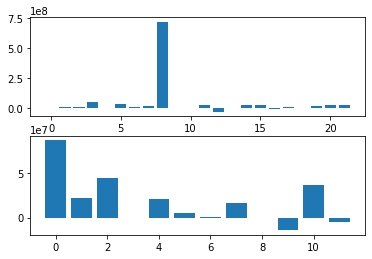

In [15]:
x = range(between1.shape[0])
y = range(between2.shape[0])

plt.subplot(2,1,1)
plt.bar(x, between1['Total Budget Changes'])
#plt.xticks(x, between1['Category'], rotation = 'vertical')

plt.subplot(2,1,2)
plt.bar(y, between2['Total Budget Changes'])
#plt.xticks(y, between2['Managing Agency'], rotation = 'vertical')


<BarContainer object of 12 artists>

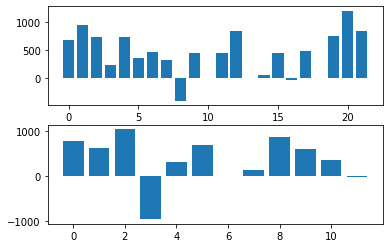

In [16]:
x = range(between1.shape[0])
y = range(between2.shape[0])

plt.subplot(2,1,1)
plt.bar(x, between1['Total Schedule Changes'])
#plt.xticks(x, between1['Category'], rotation = 'vertical')

plt.subplot(2,1,2)
plt.bar(y, between2['Total Schedule Changes'])
#plt.xticks(y, between2['Managing Agency'], rotation = 'vertical')


### Task 2 follows

Key Questions: 

Given everything you have learned, if you faced this data set in the wild, how would you proceed? 

What are the important measures? 

What are the right questions to ask, and how can the data answer them?

#### Given everything you have learned, if you faced this data set in the wild, how would you proceed? 

* Identify missing data points and ascertain if they have impact
* There is a temporal aspect here so we need to take that into account for training and test split
* We would have to decide a cut-off date and classify projects before that as a training set and after that as a test set.
* We propose 2 approaches as outlined above
    * Supervised learning approach where we attempt to define success or failure depending on project completion
    * Unsupervised learning approach where we attempt to identify groupings inherent in the data.
* We anticipate the need for some featur engineering here to obatain insights from the data - e.g. during the project if the change to budget or time is high or low relative to the original timeline.

#### What are the important measures? 

* Important measures are those of success or failure and adherence to plan in terms of time and cost

#### More Data

* It would be good to explore if we can get more data related to interim reports or project closure reports that analyse the reasons for overruns or early wins. 
    * If we have reports for the projects then we could explore adding text data to the analysis by use of NLP
* We are also going through the links in the readme to explore if some of the data could be integrated into the provided data. 
    * In order to make use of this data we would need to map columns and consolidate different data dictionaries. Guidance from the teaching staff would be great.


#### Question for the teaching staff (for team discussion 1st)

* The dataset provided is small - about 2300 rows for about 378 projects. 
* While it is conceptually interesting, it does not seem that we would be able to apply most of the deep learning approaches taught in the course. 

Hence, is this an approprite project given the scope of the course?